# Setting up the notebook

In [1]:
import os
import pandas as pd

# Set WD to location of data
os.chdir('C:/Users/riley/Documents/Coding/DSC/lyft_no_data/')

# Load the one data file to practice on
dev_df = pd.read_csv('201801-fordgobike-tripdata.csv')

# Data Cleaning and Feature Engineering

In [2]:
import numpy as np

# Get min from seconds column
dev_df['duration_min'] = np.round(dev_df['duration_sec'] / 60, 0)

In [3]:
# Use pd.to_datetime to convert the time strings to datetime objects
# for easier time series analyses

dev_df['start_time'] = pd.to_datetime(dev_df['start_time'])
dev_df['end_time'] = pd.to_datetime(dev_df['end_time'])

In [4]:
# Encode the different categorical genders to integers
genders = {'Male': 0, 'Female':1, 'Other':2}

# Use replace to replace each key in genders dict with corresponding value
dev_df['member_gender'].replace(genders, inplace=True);

In [5]:
# Apply the price calculator to separate dfs, one for each customer type
# this is pretty fast computationally

#

import math as m


customers = dev_df[dev_df['user_type'] == 'Customer']

cost_calc = lambda minute: 2 + m.ceil(max((minute - 30), 0) / 15) * 3

customers['cost_to_ride'] = customers['duration_min'].apply(cost_calc)

subscribers = dev_df[dev_df['user_type'] == 'Subscriber']

cost_calc = lambda minute: m.ceil(max((minute - 45), 0) / 15) * 3

subscribers['cost_to_ride'] = subscribers['duration_min'].apply(cost_calc)

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
dev_df_with_cost = pd.concat([subscribers, customers])

In [7]:
import datetime

# Will now interpolate the member_birth_year with the mean birth year
# Also, I'm gonna get their age by subtracting now() from their birth year
dev_df_with_cost['member_birth_year'].fillna(np.mean(dev_df_with_cost['member_birth_year']), inplace=True)

# That got years as floats so I'm changing it to int:
dev_df_with_cost['member_birth_year'] = dev_df_with_cost['member_birth_year'].apply(np.int64)

# Now let's get the current year and subtract that from birth year to get age.
now = datetime.datetime.now()
dev_df_with_cost['age'] = now.year - dev_df_with_cost['member_birth_year']

In [8]:
# Re-order the columns so the time information is at the beginning
dev_df_with_cost = dev_df_with_cost[['duration_sec', 'duration_min', 'start_time', 'end_time', 'cost_to_ride', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'age', 'member_gender', 'bike_share_for_all_trip']]

In [9]:
cols_to_drop = ['member_birth_year',
               'start_station_name',
               'end_station_name',
               'duration_sec']

dev_df_with_cost.drop(cols_to_drop, axis=1, inplace=True)

In [10]:
dev_df_with_cost.head()

,duration_min,start_time,end_time,cost_to_ride,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,age,member_gender,bike_share_for_all_trip
0,1255.0,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,243,120,37.761420,-122.426435,285,37.783521,-122.431158,2765,Subscriber,33,0.0,No
4,666.0,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,126,74,37.776435,-122.426244,19,37.788975,-122.403452,617,Subscriber,28,0.0,No
6,8.0,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,0,110,37.763708,-122.415204,134,37.752428,-122.420628,3571,Subscriber,31,0.0,No
7,3.0,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,0,81,37.775880,-122.393170,93,37.770407,-122.391198,1403,Subscriber,39,0.0,No
8,17.0,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,0,134,37.752428,-122.420628,4,37.785881,-122.408915,3675,Subscriber,32,0.0,Yes


# EDA

The purpose of this section is to get started on the EDA unit of DSC on my dev df. I still need to crunch the whole df, but by the time I do that I'll have "finished" EDA, or at least I'll know what plots I will want.

(array([1.4564e+04, 3.9142e+04, 2.6485e+04, 1.0409e+04, 3.1510e+03,
        7.6000e+02, 1.3800e+02, 3.7000e+01, 6.0000e+01, 5.6000e+01]),
 array([ 19.,  29.,  39.,  49.,  59.,  69.,  79.,  89.,  99., 109., 119.]),
 <a list of 10 Patch objects>)

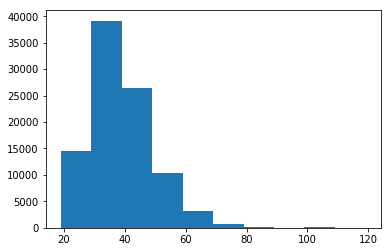

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.hist(dev_df_with_cost['age']);

Based on the histogram above, I've decided to remove values >= 100

In [25]:
# simplify the name of the df
dev_df = dev_df_with_cost

dev_df = dev_df[dev_df['age'] < 100]

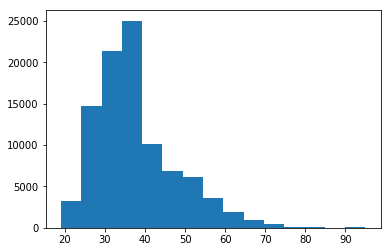

In [33]:
age = dev_df['age']

plt.hist(x=age, bins = 15);

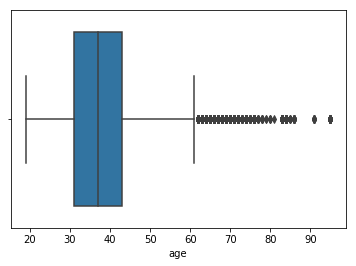

In [35]:
sns.boxplot(age);

In [42]:
dev_df = dev_df[dev_df['age'] < 90]

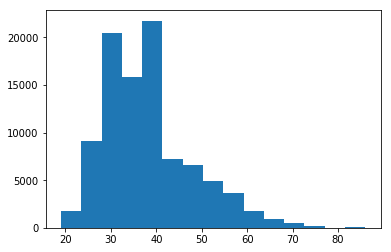

In [45]:
age = dev_df['age']

plt.hist(x=age, bins = 15);

Honestly I could cut this down to a max age of 75, it doesn't really matter - bikesharing is such a milennial thing.

In [54]:
# try to get rid of the null values in gender

test = dev_df['member_gender']

dev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94649 entries, 0 to 94798
Data columns (total 15 columns):
duration_min               94649 non-null float64
start_time                 94649 non-null datetime64[ns]
end_time                   94649 non-null datetime64[ns]
cost_to_ride               94649 non-null int64
start_station_id           94649 non-null int64
start_station_latitude     94649 non-null float64
start_station_longitude    94649 non-null float64
end_station_id             94649 non-null int64
end_station_latitude       94649 non-null float64
end_station_longitude      94649 non-null float64
bike_id                    94649 non-null int64
user_type                  94649 non-null object
age                        94649 non-null int64
member_gender              86848 non-null float64
bike_share_for_all_trip    94649 non-null object
dtypes: datetime64[ns](2), float64(6), int64(5), object(2)
memory usage: 10.8+ MB
